#### **This Notebook Attempts to use some Automatic Feature Selection Methods to improve performance**

Import the libraries and data.

In [4]:
import sys
sys.path.append('..')
from Cleaning_and_Evaluation import *
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GroupKFold, cross_val_score
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

In [5]:
#df = pd.read_csv("../data/exosomes.raw_spectrum_1.csv")
df = pd.read_csv("../data/exosomes.raw_spectrum_380-1800.csv")
#df = pd.read_csv("../data/exosomes.raw_spectrum_400-1800.csv")
#df = pd.read_csv("../data/current_clean_spectrum.csv")
#df = pd.read_csv("../data/standard_cleaning.csv")


Clean the spectra.

In [6]:
spectra_cleaning(df)
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,264,380.41003,0.040740,201210-1,Normal
1,201210-1-00,265,381.09338,0.038389,201210-1,Normal
2,201210-1-00,266,381.77676,0.036337,201210-1,Normal
3,201210-1-00,267,382.46014,0.034562,201210-1,Normal
4,201210-1-00,268,383.14349,0.033043,201210-1,Normal
...,...,...,...,...,...,...
6327505,210526-3-09,2337,1797.03870,0.014423,210526-3,Hyperglycemia
6327506,210526-3-09,2338,1797.72200,0.014693,210526-3,Hyperglycemia
6327507,210526-3-09,2339,1798.40550,0.015084,210526-3,Hyperglycemia
6327508,210526-3-09,2340,1799.08890,0.015624,210526-3,Hyperglycemia


<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

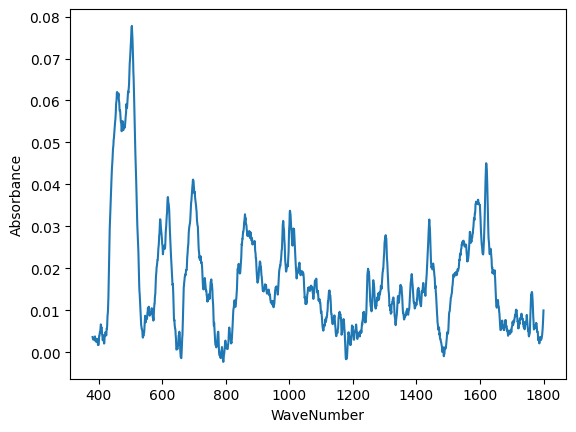

In [7]:
sample = df[df['SpecID'] == "201210-1-07"]
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

In [8]:
et = ExtraTreesClassifier(random_state=1234)
svc = SVC(random_state=1234)

In [9]:
wavelength_df = prepare_wavelength_df(df, 'Absorbance')

In [10]:
wavelength_df.head()

,380.41003,381.09338,381.77676,382.46014,383.14349,383.82687,384.51025,385.19363,385.87698,386.56036,...,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,SurID,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,0.040740,0.038389,0.036337,0.034562,0.033043,0.031761,0.030694,0.029821,0.029122,0.028576,...,0.011353,0.011227,0.010710,0.009739,0.008250,0.006180,0.003466,0.000043,201210-1,Normal
201210-1-01,0.017913,0.019512,0.020366,0.020567,0.020209,0.019386,0.018191,0.016718,0.015061,0.013312,...,0.007615,0.007520,0.007597,0.007890,0.008445,0.009307,0.010521,0.012132,201210-1,Normal
201210-1-02,0.008457,0.009025,0.009431,0.009690,0.009818,0.009829,0.009740,0.009566,0.009322,0.009023,...,0.001662,0.001840,0.001975,0.002050,0.002045,0.001944,0.001728,0.001380,201210-1,Normal
201210-1-03,0.016211,0.015287,0.014438,0.013659,0.012945,0.012291,0.011691,0.011140,0.010632,0.010163,...,0.000473,0.000574,0.000735,0.000962,0.001260,0.001635,0.002093,0.002638,201210-1,Normal
201210-1-04,0.023350,0.022861,0.022312,0.021722,0.021116,0.020514,0.019940,0.019414,0.018959,0.018598,...,0.000250,0.000056,0.000170,0.000663,0.001608,0.003079,0.005149,0.007889,201210-1,Normal


Show the performance of the current approach.

In [11]:
evaluate_model(wavelength_df, et)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ExtraTreesClassifier Cross-Validation Accuracy: 0.5802 +/- 0.1051
ExtraTreesClassifier Cross-Validation Precision: 0.5886 +/- 0.1096
ExtraTreesClassifier Cross-Validation Recall: 0.5979 +/- 0.1448
ExtraTreesClassifier Cross-Validation F1-Score: 0.5603 +/- 0.1231


In [12]:
evaluate_model(wavelength_df, svc)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC Cross-Validation Accuracy: 0.5602 +/- 0.0889
SVC Cross-Validation Precision: 0.5636 +/- 0.0925
SVC Cross-Validation Recall: 0.5674 +/- 0.1279
SVC Cross-Validation F1-Score: 0.5361 +/- 0.1015


---

##### **Chi-Squared**

In [19]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']


num_features = int(X.shape[1] * 0.1)

# Pipeline for scaling, feature selection, and classifier
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(chi2, k=num_features)),
    ('classifier', ExtraTreesClassifier(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores using the pipeline
scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'Pipeline Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

Pipeline Cross-Validation Accuracy: 0.5346 +/- 0.1097


In [20]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

num_features = int(X.shape[1] * 0.1)

# Pipeline for scaling, feature selection, and classifier
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(chi2, k=num_features)),
    ('classifier', SVC(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores using the pipeline
scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'Pipeline Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

Pipeline Cross-Validation Accuracy: 0.5177 +/- 0.1031


---

##### **Mutual Information**

In [21]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Define the number of features to keep
num_features = int(X.shape[1] * 0.1)
# num_features = int(250)

# Create a pipeline with feature selection and classifier
pipeline = Pipeline([
    ('feature_selection', SelectKBest(mutual_info_classif, k=num_features)),
    ('classifier', ExtraTreesClassifier(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Get cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'Pipeline Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

Pipeline Cross-Validation Accuracy: 0.5682 +/- 0.1117


In [22]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Define the number of features to keep
num_features = int(X.shape[1] * 0.1)
#num_features = int(250)

# Create a pipeline with feature selection and classifier
pipeline = Pipeline([
    ('feature_selection', SelectKBest(mutual_info_classif, k=num_features)),
    ('classifier', SVC(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Get cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'Pipeline Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

Pipeline Cross-Validation Accuracy: 0.5530 +/- 0.1110


---

##### **Correlation Coefficients**

In [23]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Define the number of features to keep
num_features = int(X.shape[1] * 0.1)
#num_features = 250

# Create a pipeline with feature selection and classifier
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_classif, k=num_features)),
    ('classifier', ExtraTreesClassifier(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Get cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'Pipeline Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

Pipeline Cross-Validation Accuracy: 0.5023 +/- 0.1158


In [24]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Define the number of features you want to keep
num_features = int(X.shape[1] * 0.1)
#num_features = 250

# Create a pipeline with feature selection and classifier
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_classif, k=num_features)),
    ('classifier', SVC(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Get cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'Pipeline Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

Pipeline Cross-Validation Accuracy: 0.5054 +/- 0.1136
